## Medical Insurance Costs Personal Dataset

### Dataset is availble in GitHub open source and provided here in folder as well.

Columns:

age: age of primary beneficiary

sex: insurance contractor  female, male

bmi: Body mass index, providing an understanding of body

children: Number of children covered by health insurance / Number of dependents

smoker: Whether individuals has Smoking habit

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

### For this Multivaritate Linear Regression project our Dependent feature is "charges" which we use to predict the medical costs and rest of them are Independent features such as age, sex, bmi, children, smoker,and region.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv(' Medical_Insurance.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
dataset.duplicated().sum()

1

In [7]:
dataset[dataset.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
dataset=dataset.drop(581).reset_index(drop=True)

In [9]:
dataset.iloc[[581]]

,age,sex,bmi,children,smoker,region,charges
581,39,male,45.43,2,no,southeast,6356.2707


In [10]:
dataset.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### As we can see in Data Exploration, there are no mising values, Null values, and can see basic statistics to understand the distribution of dataset.


## Exploratory Data Analysis

In [11]:
dataset[["sex"]].value_counts()


sex   
male      675
female    662
dtype: int64

In [12]:
dataset[["smoker"]].value_counts()


smoker
no        1063
yes        274
dtype: int64

In [13]:
dataset[["region"]].value_counts()

region   
southeast    364
southwest    325
northeast    324
northwest    324
dtype: int64

In [14]:
#Convert categorical variables such as sex, smoker, and region into numerical values using label and One-Hot Encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [15]:
encoder = LabelEncoder()

#Encoding for "sex:{male:1, Female:0}" and 'smoker:{No:0, Yes:1}' column

dataset['sex'] = encoder.fit_transform(dataset['sex'])
dataset['smoker'] = encoder.fit_transform(dataset['smoker'])

In [16]:
dataset[['sex','smoker']].head()

,sex,smoker
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [17]:
encoder=OneHotEncoder()

#Encoding for "region" column
data_encoder = encoder.fit_transform(dataset[["region"]]).toarray()
encoder_df=pd.DataFrame(data_encoder,columns=encoder.get_feature_names_out())

In [18]:
encoder_df

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1332,0.0,1.0,0.0,0.0
1333,1.0,0.0,0.0,0.0
1334,0.0,0.0,1.0,0.0
1335,0.0,0.0,0.0,1.0


In [19]:
#Combined dataset 
new_df = pd.concat([dataset,encoder_df],axis=1)
new_df

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1333,18,0,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1334,18,0,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1335,21,0,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


In [20]:
new_df[["sex"]].value_counts()

sex
1      675
0      662
dtype: int64

In [21]:
new_df[["smoker"]].value_counts()

smoker
0         1063
1          274
dtype: int64

In [22]:

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   region            1337 non-null   object 
 6   charges           1337 non-null   float64
 7   region_northeast  1337 non-null   float64
 8   region_northwest  1337 non-null   float64
 9   region_southeast  1337 non-null   float64
 10  region_southwest  1337 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 115.0+ KB


In [23]:
new_df.drop(['region'], axis=1, inplace= True)
new_df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1333,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1334,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1335,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


In [24]:
new_df.to_csv("Medical_Insurance_Cleaned.csv")

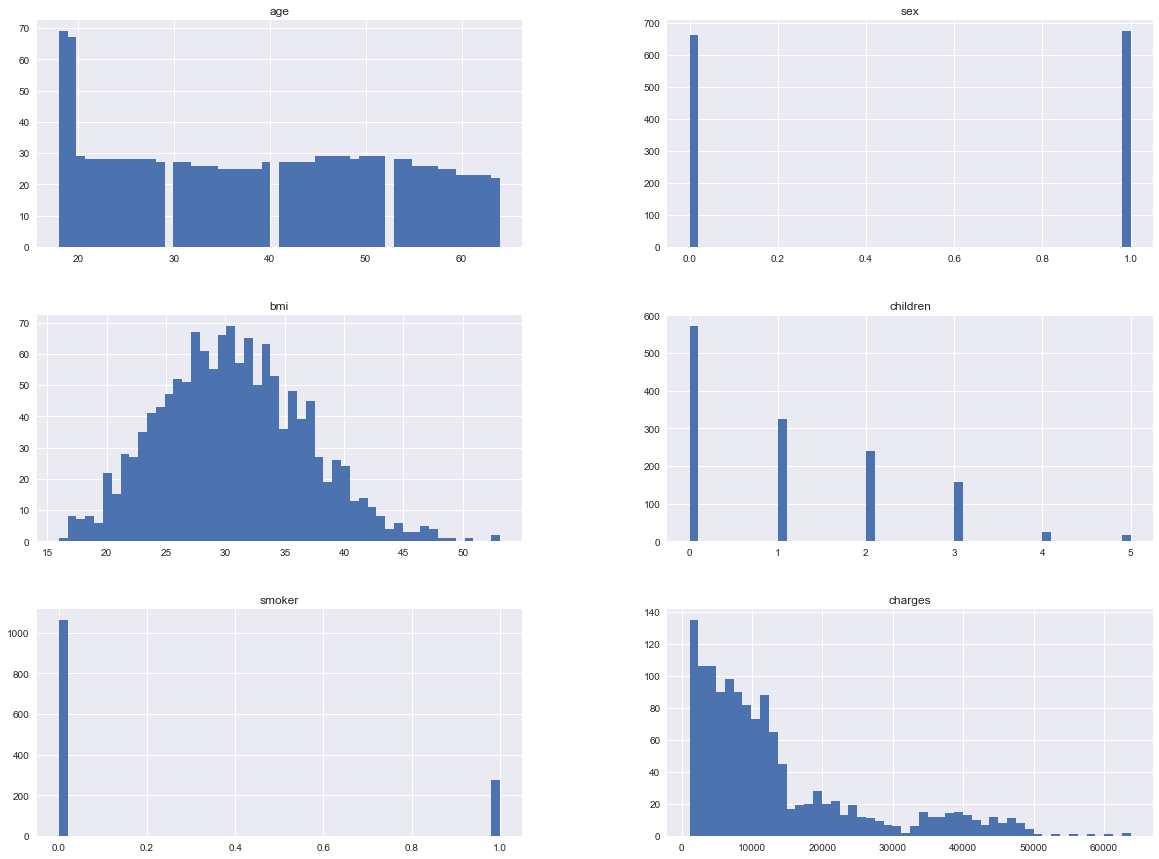

In [50]:
## Plot desnity plot for all features
plt.style.use('seaborn')
dataset.hist(bins=50,figsize=(20,15))
plt.show()

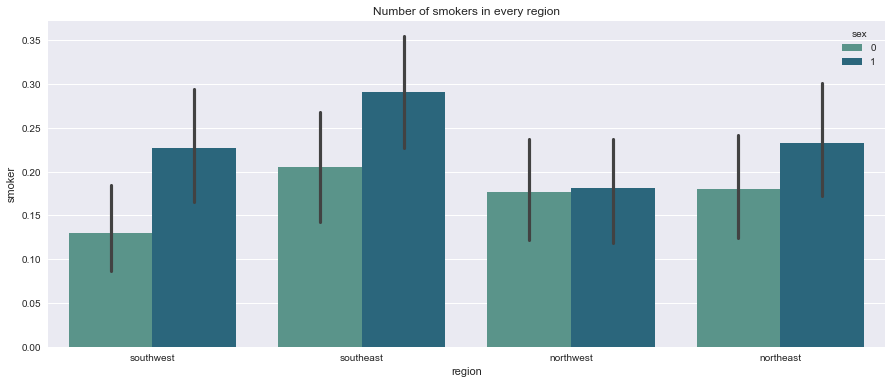

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(x='region', y='smoker', data=dataset, palette='crest', hue='sex' )
plt.title('Number of smokers in every region')
plt.show()

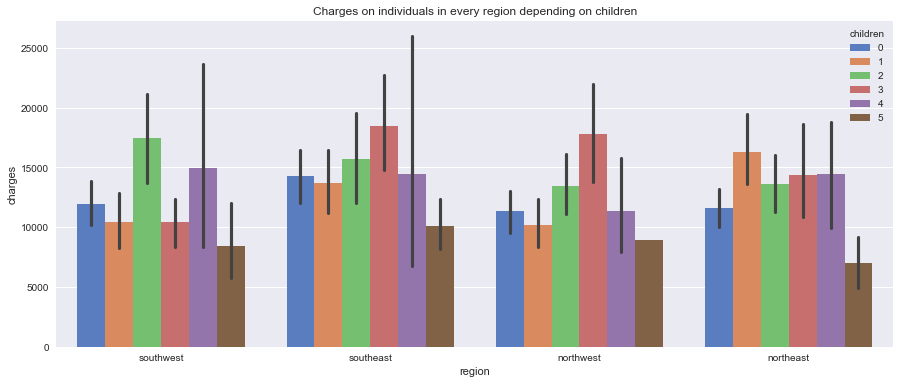

In [51]:
plt.figure(figsize=(15,6))
sns.barplot(x='region', y='charges', data=dataset, palette='muted', hue='children' )
plt.title('Charges on individuals in every region depending on children')
plt.show()

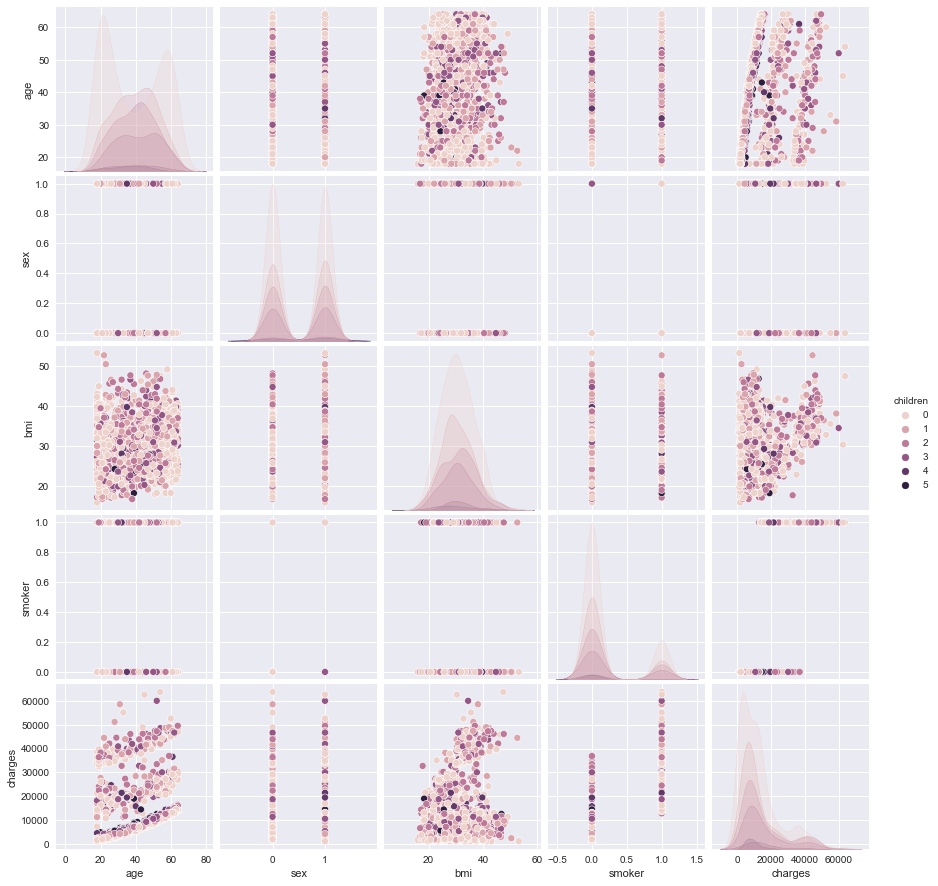

In [111]:
sns.pairplot(dataset, hue='children')
plt.show()

In [96]:
new_df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.298308,0.001868,0.001495,-0.012311,0.009415
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.058044,-0.002008,-0.012482,0.017578,-0.003767
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.198401,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.067389,-0.023202,0.026044,-0.023492,0.021538
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.787234,0.002597,-0.036321,0.068282,-0.037168
charges,0.298308,0.058044,0.198401,0.067389,0.787234,1.000000,0.005945,-0.038695,0.073578,-0.043637
region_northeast,0.001868,-0.002008,-0.138178,-0.023202,0.002597,0.005945,1.000000,-0.319842,-0.345909,-0.320493
region_northwest,0.001495,-0.012482,-0.136138,0.026044,-0.036321,-0.038695,-0.319842,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.017578,0.270057,-0.023492,0.068282,0.073578,-0.345909,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.003767,-0.006211,0.021538,-0.037168,-0.043637,-0.320493,-0.320493,-0.346614,1.000000


<AxesSubplot:>

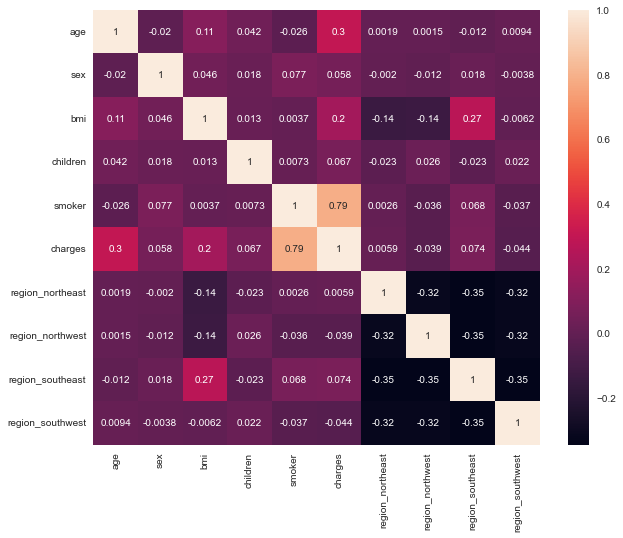

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap (new_df.corr(),annot= True,)

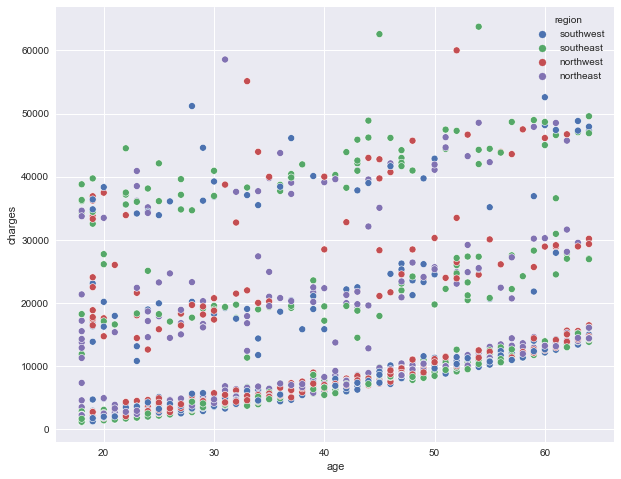

In [55]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= 'age', y= 'charges', data=dataset, hue="region")
plt.show()

Text(0.5, 1.0, "Boxplot for independent features ['age', 'sex', 'bmi', 'children', 'smoker', 'region']")

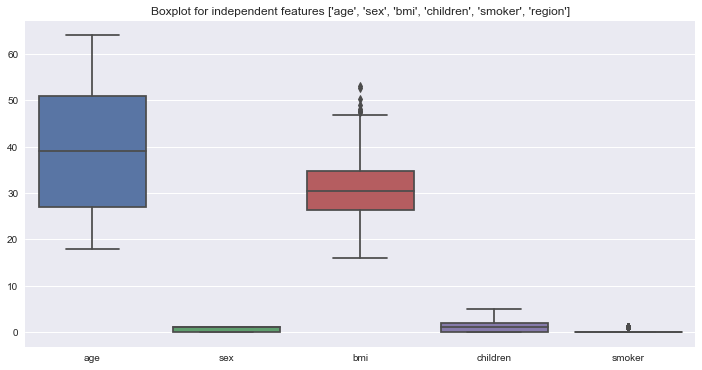

In [64]:
cols= [feature for feature in dataset.columns if feature!='charges']
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset[cols])
plt.title(f'Boxplot for independent features {cols}')

/Users/manikethaley/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot for dependent feature')

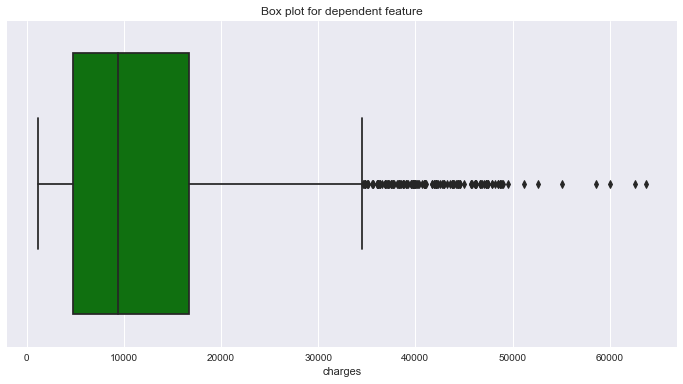

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(new_df['charges'],color='green')
plt.title("Box plot for dependent feature")

#### As we observe there are outliers in the dependent feature "charges". In the Medical Costs Personal Dataset, the charges column represents medical costs, and the presence of outliers is natural because certain individuals may have extremely high medical expenses due to severe health conditions, age, smoking habits, or other factors. 